Using device: cpu
Number of classes: 36


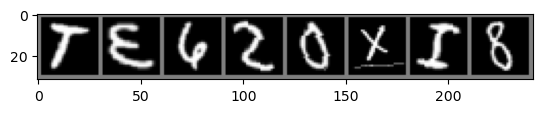

T 3 6 S 0 X I 8


In [ ]:
# Part 3: Building a CNN
# Step 1

import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split, TensorDataset

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# using transformations
transform_train = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.RandomRotation(10),  # Random rotation for data augmentation
    transforms.RandomHorizontalFlip(),  # Random horizontal flip for data augmentation
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

transform_test = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Loading the dataset
dataset_path = './cnn_dataset'
dataset = datasets.ImageFolder(root=dataset_path, transform=transform_train)
num_classes = len(dataset.classes)
print(f"Number of classes: {num_classes}")

# Splitting the dataset into training, validation, and test sets (80% train, 10% validation, 10% test)
train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_data, val_data, test_data = random_split(dataset, [train_size, val_size, test_size])

# DataLoaders for training, validation, and test sets
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)


# Visualizing a few images from the dataset
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')
    plt.show()

dataiter = iter(train_loader)
images, labels = next(dataiter)

# display images
imshow(torchvision.utils.make_grid(images[:8]))
print(' '.join(f'{dataset.classes[labels[j]]}' for j in range(8)))

In [ ]:
# step 2 
# building the CNN model

import torch
import torch.nn as nn
import torch.optim as optim
from torchinfo import summary
from torch.utils.data import DataLoader, random_split, TensorDataset
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

# Define the CNN architecture
class BasicCNN(nn.Module):
    def __init__(self, num_classes):
        super(BasicCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        
        # Calculating output size
        self._to_linear = None
        self.convs(torch.randn(1, 1, 28, 28))
        
        self.fc1 = nn.Linear(self._to_linear, 256)
        self.fc2 = nn.Linear(256, num_classes)  # Output layer with neurons
        self.dropout = nn.Dropout(0.5)    # adding dropout
        self.softmax = nn.LogSoftmax(dim=1)
    
    def convs(self, x):
        x = nn.ReLU()(self.conv1(x))
        x = nn.MaxPool2d(2)(x)
        x = nn.ReLU()(self.conv2(x))
        x = nn.MaxPool2d(2)(x)
        x = nn.ReLU()(self.conv3(x))
        x = nn.MaxPool2d(2)(x)
        
        if self._to_linear is None:
            self._to_linear = x.view(x.size(0), -1).shape[1]
        return x
    
    def forward(self, x):
        x = self.convs(x)
        x = x.view(x.size(0), -1)  # fully connected layer
        x = nn.ReLU()(self.fc1(x))
        x = self.dropout(x)
        x = self.softmax(self.fc2(x))
        return x

# model summary
model = BasicCNN(num_classes=num_classes).to(device)
summary(model, input_size=(32, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
BasicCNN                                 [32, 36]                  --
├─Conv2d: 1-1                            [32, 32, 28, 28]          320
├─Conv2d: 1-2                            [32, 64, 14, 14]          18,496
├─Conv2d: 1-3                            [32, 128, 7, 7]           73,856
├─Linear: 1-4                            [32, 256]                 295,168
├─Dropout: 1-5                           [32, 256]                 --
├─Linear: 1-6                            [32, 36]                  9,252
├─LogSoftmax: 1-7                        [32, 36]                  --
Total params: 397,092
Trainable params: 397,092
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 249.58
Input size (MB): 0.10
Forward/backward pass size (MB): 11.31
Params size (MB): 1.59
Estimated Total Size (MB): 13.00

Class Distribution:
0: 2800 images
1: 2800 images
2: 2800 images
3: 2800 images
4: 2800 images
5: 2800 images
6: 2800 images
7: 2800 images
8: 2800 images
9: 2800 images
A: 2800 images
B: 2800 images
C: 2800 images
D: 2800 images
E: 2800 images
F: 2800 images
G: 2800 images
H: 2800 images
I: 2800 images
J: 2800 images
K: 2800 images
L: 2800 images
M: 2800 images
N: 2800 images
O: 2800 images
P: 2800 images
Q: 2800 images
R: 2800 images
S: 2800 images
T: 2800 images
U: 2800 images
V: 2800 images
W: 2800 images
X: 2800 images
Y: 2800 images
Z: 2800 images


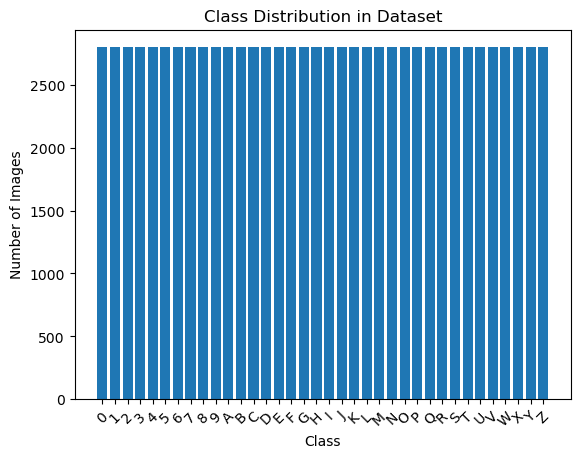

In [ ]:
# statistics of the dataset

# calculating class distribution and pixel range value
from collections import Counter

class_counts = Counter([label for _, label in dataset])
class_labels = [dataset.classes[label] for label in class_counts.keys()]

# Total number of images per class
print("Class Distribution:")
for label, count in zip(class_labels, class_counts.values()):
    print(f"{label}: {count} images")

# Visualizing using as a bar chart
import matplotlib.pyplot as plt

plt.bar(class_labels, class_counts.values())
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Class Distribution in Dataset")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Initialize loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)

# Helper function to compute accuracy
def compute_accuracy(model, loader):
    correct = 0
    total = 0
    model.eval()
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total

Number of classes: 36
Epoch 1/10, Training Loss: 2509.7063, Validation Loss: 154.5989, Training Acc: 0.8350, Validation Acc: 0.8291
Epoch 2/10, Training Loss: 1458.8344, Validation Loss: 133.3170, Training Acc: 0.8612, Validation Acc: 0.8498
Epoch 3/10, Training Loss: 1271.5143, Validation Loss: 120.8927, Training Acc: 0.8699, Validation Acc: 0.8566
Epoch 4/10, Training Loss: 1164.4854, Validation Loss: 111.6925, Training Acc: 0.8813, Validation Acc: 0.8758
Epoch 5/10, Training Loss: 1102.5658, Validation Loss: 110.7468, Training Acc: 0.8841, Validation Acc: 0.8734
Epoch 6/10, Training Loss: 1045.6776, Validation Loss: 108.5381, Training Acc: 0.8888, Validation Acc: 0.8774
Epoch 7/10, Training Loss: 1014.1357, Validation Loss: 102.5518, Training Acc: 0.8916, Validation Acc: 0.8828
Epoch 8/10, Training Loss: 985.2863, Validation Loss: 107.8651, Training Acc: 0.8875, Validation Acc: 0.8808
Epoch 9/10, Training Loss: 961.3408, Validation Loss: 101.5590, Training Acc: 0.8946, Validation Ac

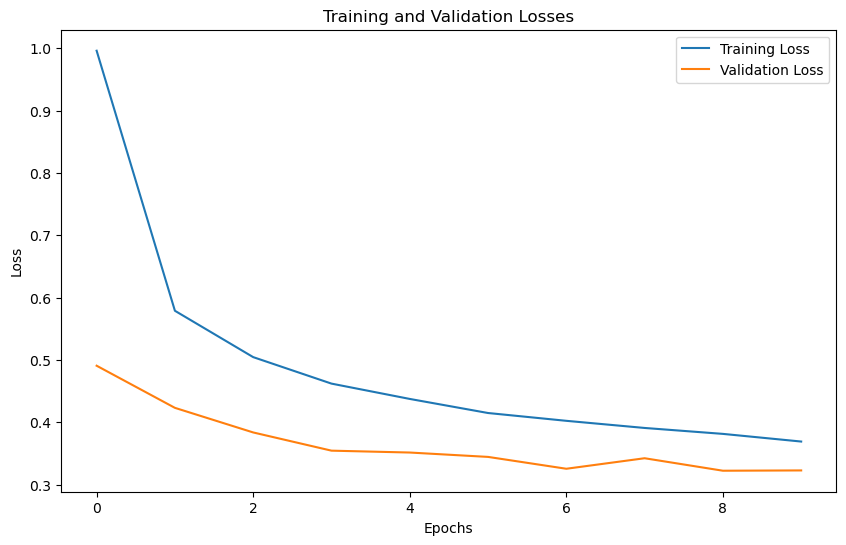

Test Accuracy: 88.27%


In [ ]:
# step 3
# Training the model
def train_model_with_accuracy_tracking(model, train_loader, val_loader, loss_function, optimizer, scheduler=None, epochs=10):
    train_accuracies, val_accuracies = [], []
    train_losses, val_losses = [], []

    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = loss_function(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        
        if scheduler:
            scheduler.step()

        train_losses.append(train_loss / len(train_loader))

        # Validation phase
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = loss_function(outputs, labels)
                val_loss += loss.item()
                
        val_losses.append(val_loss / len(val_loader))

        # Calculating accuracies using helper function defined above
        train_acc = compute_accuracy(model, train_loader)
        val_acc = compute_accuracy(model, val_loader)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)

        print(f"Epoch {epoch+1}/{epochs}, Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, "
              f"Training Acc: {train_acc:.4f}, Validation Acc: {val_acc:.4f}")

    return train_losses, val_losses, train_accuracies, val_accuracies

# Training the model
train_losses, val_losses, train_accuracies, val_accuracies = train_model_with_accuracy_tracking(
    model, train_loader, val_loader, criterion, optimizer, scheduler, epochs=10
)

# Visualizing training and validation losses
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

# Test accuracy
test_accuracy = compute_accuracy(model, test_loader)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


In [ ]:
# step 4
# Model 1: CNN with Batch Normalization
class CNNWithBatchNorm(nn.Module):
    def __init__(self, num_classes):
        super(CNNWithBatchNorm, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self._to_linear = None
        self.convs(torch.randn(1, 1, 28, 28))
        
        self.fc1 = nn.Linear(self._to_linear, 256)
        self.fc2 = nn.Linear(256, num_classes)
        self.dropout = nn.Dropout(0.5)
    
    def convs(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        if self._to_linear is None:
            self._to_linear = x.view(x.size(0), -1).shape[1]
        return x
    
    def forward(self, x):
        x = self.convs(x)
        x = x.view(x.size(0), -1)
        x = self.dropout(nn.ReLU()(self.fc1(x)))
        x = self.fc2(x)
        return x

# Initialize modified "Model 1"
model_1 = CNNWithBatchNorm(num_classes=num_classes).to(device)
optimizer_1 = optim.Adam(model_1.parameters(), lr=0.001)
scheduler_1 = optim.lr_scheduler.StepLR(optimizer_1, step_size=10, gamma=0.5)


In [ ]:

# Defining data augmentations for training data
transform_train_augmented = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Loading the augmented data
train_data_augmented = datasets.ImageFolder(root=dataset_path, transform=transform_train_augmented)

# Model 2: CNN with Data Augmentation and Early Stopping
model_2 = BasicCNN(num_classes = num_classes).to(device)
optimizer_2 = optim.Adam(model_2.parameters(), lr=0.001)
early_stopping_patience = 5

# Early stopping
class EarlyStopping:
    def __init__(self, patience=5, delta=0):
        self.patience = patience
        self.delta = delta
        self.best_loss = None
        self.counter = 0
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None or val_loss < self.best_loss - self.delta:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True

early_stopping = EarlyStopping(patience = early_stopping_patience)


In [ ]:
# Model 3: CNN with Batch Normalization & Gradient Accumulation
class CNNWithBatchNormGradAccum(nn.Module):
    def __init__(self, num_classes):
        super(CNNWithBatchNormGradAccum, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self._to_linear = None
        self.convs(torch.randn(1, 1, 28, 28))
        
        self.fc1 = nn.Linear(self._to_linear, 256)
        self.fc2 = nn.Linear(256, num_classes)
        self.dropout = nn.Dropout(0.5)
    
    def convs(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        if self._to_linear is None:
            self._to_linear = x.view(x.size(0), -1).shape[1]
        return x
    
    def forward(self, x):
        x = self.convs(x)
        x = x.view(x.size(0), -1)
        x = self.dropout(nn.ReLU()(self.fc1(x)))
        x = self.fc2(x)
        return x

# Initializing "Model 3"
model_3 = CNNWithBatchNormGradAccum(num_classes=num_classes).to(device)
optimizer_3 = optim.Adam(model_3.parameters(), lr=0.001)
scheduler_3 = optim.lr_scheduler.StepLR(optimizer_3, step_size=10, gamma=0.5)
accumulation_steps = 4  # Accumulate gradients over 4 mini-batches


In [ ]:
# step 5
# tracking the highest accuracy across all models
highest_accuracy = 0.0
best_model_name = None

# training function to track and save the best model across all three

def train_and_evaluate_best_model(model, model_name, train_loader, val_loader, loss_function, optimizer, scheduler=None, early_stopping=None, accumulation_steps=1, epochs=10):
    global highest_accuracy, best_model_name 
    best_model_accuracy = 0.0 

    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for i, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = loss_function(outputs, labels) / accumulation_steps
            loss.backward()

            # Gradient accumulation
            if (i + 1) % accumulation_steps == 0:
                optimizer.step()
                optimizer.zero_grad()
            train_loss += loss.item()

        if scheduler:
            scheduler.step()

        # Validation phase
        model.eval()
        val_loss = 0
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                val_loss += loss_function(outputs, labels).item()
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_accuracy = correct / total
        print(f"Epoch [{epoch+1}/{epochs}], Model: {model_name}, Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, Validation Acc: {val_accuracy:.4f}")

        # Updating best accuracy for the current model
        if val_accuracy > best_model_accuracy:
            best_model_accuracy = val_accuracy

        # Early stopping
        if early_stopping:
            early_stopping(val_loss)
            if early_stopping.early_stop:
                print("Early stopping triggered.")
                break

    # updating the best accuracy and the corresponding model
    if best_model_accuracy > highest_accuracy:
        highest_accuracy = best_model_accuracy
        best_model_name = model_name
        torch.save(model.state_dict(), 'gsingh55_assignment2_part_3.pt')
        print(f"Overall best model updated to {model_name} with accuracy: {highest_accuracy:.4f}")

# training the models
train_and_evaluate_best_model(model_1, "Model 1", train_loader, val_loader, criterion, optimizer_1, scheduler=scheduler_1, epochs=10)
train_and_evaluate_best_model(model_2, "Model 2", train_loader, val_loader, criterion, optimizer_2, early_stopping=early_stopping, epochs=10)
train_and_evaluate_best_model(model_3, "Model 3", train_loader, val_loader, criterion, optimizer_3, scheduler=scheduler_3, accumulation_steps=accumulation_steps, epochs=10)

# Displaying the result
print(f"The best model overall is {best_model_name} with an accuracy of {highest_accuracy:.4f}")


Epoch [1/10], Model: Model 1, Training Loss: 2703.5452, Validation Loss: 158.9534, Validation Acc: 0.8290
Epoch [2/10], Model: Model 1, Training Loss: 1692.1473, Validation Loss: 135.5133, Validation Acc: 0.8530
Epoch [3/10], Model: Model 1, Training Loss: 1463.2300, Validation Loss: 121.7209, Validation Acc: 0.8585
Epoch [4/10], Model: Model 1, Training Loss: 1337.0626, Validation Loss: 113.9295, Validation Acc: 0.8663
Epoch [5/10], Model: Model 1, Training Loss: 1248.7217, Validation Loss: 108.5965, Validation Acc: 0.8743
Epoch [6/10], Model: Model 1, Training Loss: 1181.5944, Validation Loss: 107.8319, Validation Acc: 0.8769
Epoch [7/10], Model: Model 1, Training Loss: 1108.5445, Validation Loss: 102.3980, Validation Acc: 0.8846
Epoch [8/10], Model: Model 1, Training Loss: 1052.4775, Validation Loss: 104.1321, Validation Acc: 0.8813
Epoch [9/10], Model: Model 1, Training Loss: 1015.3765, Validation Loss: 101.5783, Validation Acc: 0.8851
Epoch [10/10], Model: Model 1, Training Loss: 

In [ ]:
# saving the weight of the best overall model
best_model = CNNWithBatchNormGradAccum(num_classes=num_classes).to(device)
best_model.load_state_dict(torch.load('gsingh55_assignment2_part_3.pt', weights_only=True))

# Computing test accuracy for the best overall model
best_test_accuracy = compute_accuracy(best_model, test_loader)
print(f"Best Model Test Accuracy: {best_test_accuracy * 100:.2f}%")


Best Model Test Accuracy: 89.26%


In [ ]:
# model with highest accuracy
model = CNNWithBatchNormGradAccum(num_classes=num_classes).to(device)

# Loading the saved weights for Model 3
model.load_state_dict(torch.load('gsingh55_assignment2_part_3.pt', weights_only=True))

# summary of model architecture
from torchinfo import summary
summary(model, input_size=(32, 1, 28, 28))  # Adjust batch size if necessary

Layer (type:depth-idx)                   Output Shape              Param #
CNNWithBatchNormGradAccum                [32, 36]                  --
├─Sequential: 1-1                        [32, 32, 14, 14]          --
│    └─Conv2d: 2-1                       [32, 32, 28, 28]          320
│    └─BatchNorm2d: 2-2                  [32, 32, 28, 28]          64
│    └─ReLU: 2-3                         [32, 32, 28, 28]          --
│    └─MaxPool2d: 2-4                    [32, 32, 14, 14]          --
├─Sequential: 1-2                        [32, 64, 7, 7]            --
│    └─Conv2d: 2-5                       [32, 64, 14, 14]          18,496
│    └─BatchNorm2d: 2-6                  [32, 64, 14, 14]          128
│    └─ReLU: 2-7                         [32, 64, 14, 14]          --
│    └─MaxPool2d: 2-8                    [32, 64, 7, 7]            --
├─Sequential: 1-3                        [32, 128, 3, 3]           --
│    └─Conv2d: 2-9                       [32, 128, 7, 7]           73,856
│    

In [ ]:
# step 6
import time

# Start time
start_time = time.time()

# Re-training the best model to fetch the training duration
train_losses, val_losses, train_accuracies, val_accuracies = train_model_with_accuracy_tracking(
    model, train_loader, val_loader, criterion, optimizer, scheduler, epochs=10
)

# end time for training
end_time = time.time()
training_duration = end_time - start_time
print(f"Time to train the model: {training_duration:.2f} seconds")

# accuracy is already calcuated above

# Computing precision, recall, and F1 score on test data
all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        

precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted')
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"F1 Score: {f1*100:.2f}%")

Epoch 1/10, Training Loss: 939.2063, Validation Loss: 91.4283, Training Acc: 0.8937, Validation Acc: 0.8925
Epoch 2/10, Training Loss: 940.0331, Validation Loss: 90.3130, Training Acc: 0.8944, Validation Acc: 0.8904
Epoch 3/10, Training Loss: 933.2841, Validation Loss: 91.3030, Training Acc: 0.8936, Validation Acc: 0.8906
Epoch 4/10, Training Loss: 931.6565, Validation Loss: 90.3278, Training Acc: 0.8944, Validation Acc: 0.8904
Epoch 5/10, Training Loss: 936.3135, Validation Loss: 90.1938, Training Acc: 0.8951, Validation Acc: 0.8912
Epoch 6/10, Training Loss: 934.6197, Validation Loss: 90.9726, Training Acc: 0.8936, Validation Acc: 0.8930
Epoch 7/10, Training Loss: 938.4721, Validation Loss: 90.7863, Training Acc: 0.8931, Validation Acc: 0.8910
Epoch 8/10, Training Loss: 934.7859, Validation Loss: 90.0781, Training Acc: 0.8937, Validation Acc: 0.8920
Epoch 9/10, Training Loss: 935.4594, Validation Loss: 90.6859, Training Acc: 0.8945, Validation Acc: 0.8906
Epoch 10/10, Training Loss: 

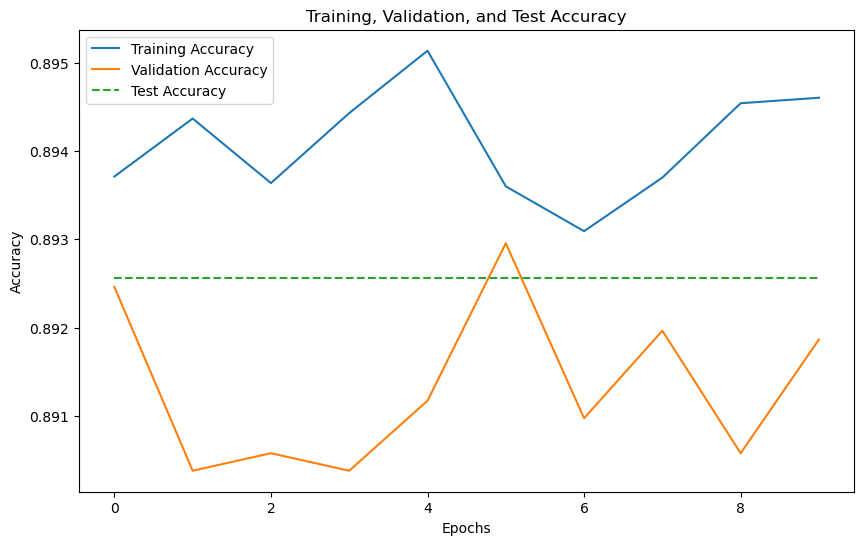

In [ ]:
# Step 7: Visualize Results
# a. Plotting Training, Validation, and Test Accuracy

# Extendig test accuracy to match the number of epochs
test_accuracy_line = [best_test_accuracy] * len(train_accuracies)

plt.figure(figsize=(10, 6))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.plot(test_accuracy_line, label='Test Accuracy', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.legend()
plt.show()


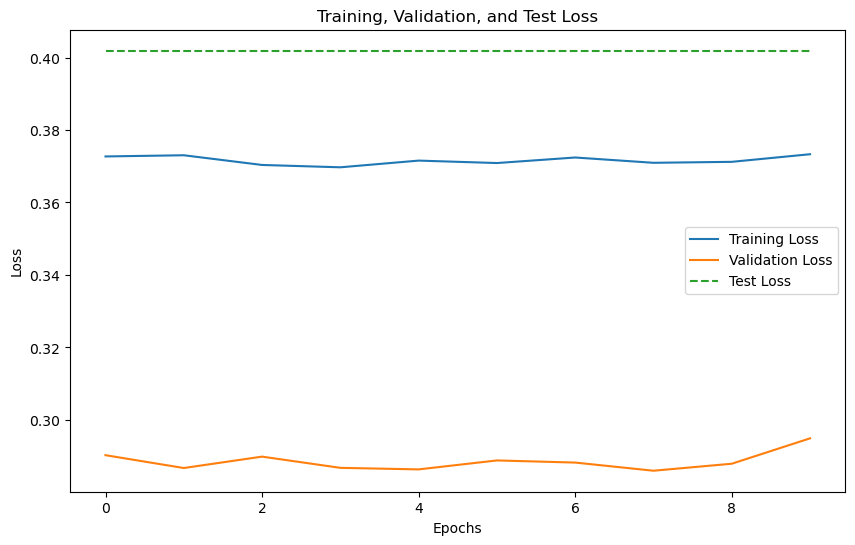

In [ ]:
# b. Plotting Training, Validation, and Test Loss
test_loss_value = np.mean([criterion(model(inputs.to(device)), labels.to(device)).item() for inputs, labels in test_loader])
test_loss_line = [test_loss_value] * len(train_losses)

plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.plot(test_loss_line, label='Test Loss', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Loss')
plt.legend()
plt.show()


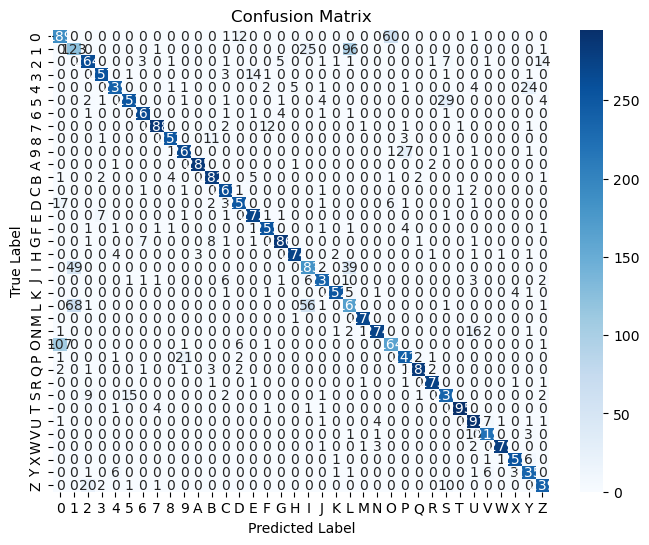

In [ ]:
# c. Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=dataset.classes, yticklabels=dataset.classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



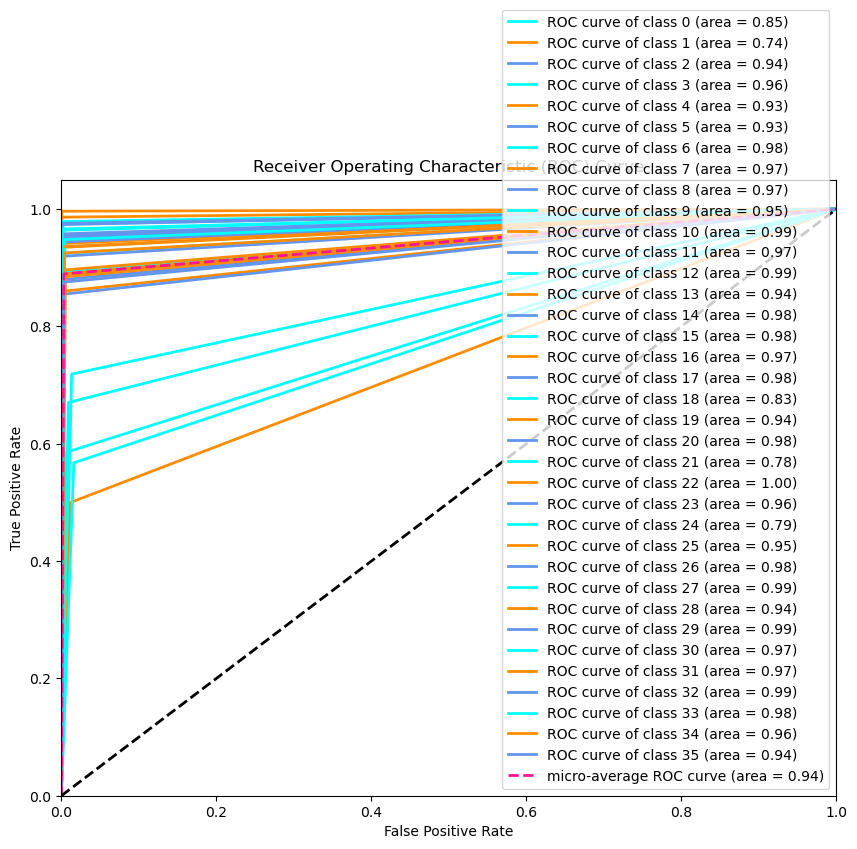

In [ ]:
# d. ROC Curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# Binarizing the labels for multi-class
all_labels_binarized = label_binarize(all_labels, classes=np.arange(num_classes))
all_preds_binarized = label_binarize(all_preds, classes=np.arange(num_classes))

# Computing ROC curve and the area for each class
false_positive_rate = dict()
true_positive_rate = dict()
roc_auc = dict()
for i in range(num_classes):
    false_positive_rate[i], true_positive_rate[i], _ = roc_curve(all_labels_binarized[:, i], all_preds_binarized[:, i])
    roc_auc[i] = auc(false_positive_rate[i], true_positive_rate[i])

# Computing micro-average ROC curve and ROC area
false_positive_rate["micro"], true_positive_rate["micro"], _ = roc_curve(all_labels_binarized.ravel(), all_preds_binarized.ravel())
roc_auc["micro"] = auc(false_positive_rate["micro"], true_positive_rate["micro"])

# Plotting
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(num_classes), colors):
    plt.plot(false_positive_rate[i], true_positive_rate[i], color=color, lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

plt.plot(false_positive_rate["micro"], true_positive_rate["micro"], color='deeppink', linestyle='--', linewidth=2,
         label=f'micro-average ROC curve (area = {roc_auc["micro"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


### References
**PyTorch Documentation**
- [PyTorch Basics](https://pytorch.org/docs/stable/index.html)
- [Torch.nn Module](https://pytorch.org/docs/stable/nn.html)
- [Loss Functions](https://pytorch.org/docs/stable/nn.html#loss-functions)
- [Optimizers](https://pytorch.org/docs/stable/optim.html)
- [Data Loading and Transformation](https://pytorch.org/vision/stable/index.html)

**Matplotlib Documentation**
- [Matplotlib Pyplot](https://matplotlib.org/stable/contents.html)

**Numpy Documentation**
- [Numpy Documentation](https://numpy.org/doc/stable/)

**Python Official Documentation**
- [Python Documentation](https://docs.python.org/3/)
